**Dataset:** [Rush Kirubi, Kaggle](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data preparation

### Reading data

In [7]:
data = pd.read_csv('../datasets/sales_rush_kirubi.csv')
print(data.count())
data.head()

Name               16717
Platform           16719
Year_of_Release    16450
Genre              16717
Publisher          16665
NA_Sales           16719
EU_Sales           16719
JP_Sales           16719
Other_Sales        16719
Global_Sales       16719
Critic_Score        8137
Critic_Count        8137
User_Score         10015
User_Count          7590
Developer          10096
Rating              9950
dtype: int64


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning data

In [18]:
data_clean = data[data['Critic_Count'].notna()]
data_clean = data_clean[data_clean['User_Score'].notna()]
data_clean = data_clean[data_clean['User_Score'] != 'tbd']
data_clean = data_clean[data_clean['Developer'].notna()]
data_clean = data_clean[data_clean['Developer'].notna()]
data_clean = data_clean[data_clean['Rating'].notna()]
data_clean = data_clean[data_clean['Publisher'].notna()]
data_clean = data_clean[data_clean['Year_of_Release'].notna()]
data_clean.count()

Name               6825
Platform           6825
Year_of_Release    6825
Genre              6825
Publisher          6825
NA_Sales           6825
EU_Sales           6825
JP_Sales           6825
Other_Sales        6825
Global_Sales       6825
Critic_Score       6825
Critic_Count       6825
User_Score         6825
User_Count         6825
Developer          6825
Rating             6825
dtype: int64

In [20]:
# filtering to the period of 2000 to 2016
print(data_clean['Year_of_Release'].describe())
data_clean = data_clean[data_clean['Year_of_Release'] >= 2000]
data_clean.describe()

count    6825.000000
mean     2007.436777
std         4.211248
min      1985.000000
25%      2004.000000
50%      2007.000000
75%      2011.000000
max      2016.000000
Name: Year_of_Release, dtype: float64


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000
mean,2007.551734,0.389452,0.232379,0.059858,0.082467,0.764339,70.131930,29.103469,172.922769
std,4.091946,0.963955,0.684310,0.275664,0.270845,1.951595,13.829731,19.242673,584.894703
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.740000,80.000000,40.000000,87.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


## Genre analysis

### Count by genre

In [24]:
data_count_by_genre = data_clean.groupby('Genre')['Name'].count()
data_count_by_genre = data_count_by_genre.sort_values(ascending=False)
data_count_by_genre

Genre
Action          1619
Sports           941
Shooter          859
Role-Playing     691
Racing           575
Platform         397
Misc             382
Fighting         369
Simulation       291
Strategy         261
Adventure        245
Puzzle           116
Name: Name, dtype: int64

/var/folders/hk/vc7_d06j5yq99t_fqllsqsxc0000gn/T/ipykernel_36594/1369889195.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_count_by_genre.index, rotation=45)


[Text(0, 0, '1619'),
 Text(0, 0, '941'),
 Text(0, 0, '859'),
 Text(0, 0, '691'),
 Text(0, 0, '575'),
 Text(0, 0, '397'),
 Text(0, 0, '382'),
 Text(0, 0, '369'),
 Text(0, 0, '291'),
 Text(0, 0, '261'),
 Text(0, 0, '245'),
 Text(0, 0, '116')]

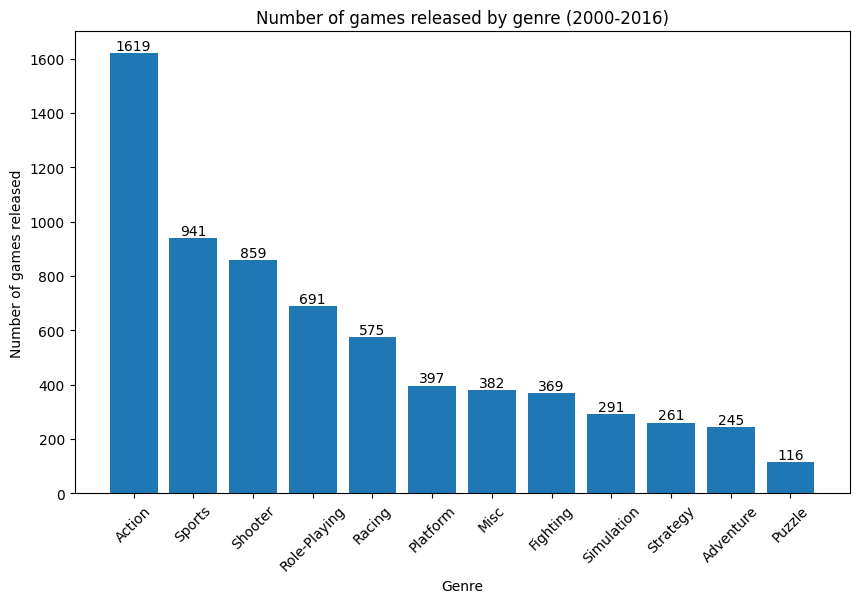

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_container = ax.bar(data_count_by_genre.index, data_count_by_genre)
ax.set(xlabel='Genre', ylabel='Number of games released')
ax.set(title='Number of games released by genre (2000-2016)')
ax.set_xticklabels(data_count_by_genre.index, rotation=45)
ax.bar_label(bar_container)